<a href="https://colab.research.google.com/github/RudreshVeerkhare/Data_Science_Lab/blob/main/Linear_Regression_on_Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Rudresh Veerkhare  
UID : 2018130061

Download Dataset from drive folder

In [126]:
!gdown --id "1YHE-ghLJ-OBwg6GNQOcR43V_maOCP4kY" -O "auto-mpg.csv"

Downloading...
From: https://drive.google.com/uc?id=1YHE-ghLJ-OBwg6GNQOcR43V_maOCP4kY
To: /content/auto-mpg.csv
100% 18.1k/18.1k [00:00<00:00, 13.5MB/s]


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = "white")

df_org = pd.read_csv("auto-mpg.csv")

In [128]:
df_org.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Check for missing values

In [129]:
df_org.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

It shows that no missing values are there.

Lets check for datatypes of features

In [130]:
df_org.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

It's weird that horsepower is object datatype!!  
Lets see its unique values and determine  

In [131]:
df_org["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There is a question mark in horsepower section, that seems to represent missing value  
Lets substitute them for `nan`

In [132]:
df_org["horsepower"] = df_org["horsepower"].replace("?", np.nan)

now check for total missing values

In [133]:
df_org.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Horsepower has 6 missing values, we'll drop them as missing value count is less

In [134]:
df_no_na = df_org.dropna()
df_no_na["horsepower"] = df_no_na["horsepower"].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
df_no_na.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [136]:
df_no_na.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [137]:
df_no_na.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Origin is based on the country,  
1 => USA  
2 => Europe  
3 => Japan  

In [138]:
df_viz = df_no_na
df_viz["origin"] = df_viz["origin"].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
df_viz["origin"].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: origin, dtype: object

In [140]:
def boxplot_feature_wise(var):
    data_plt = pd.concat([df_viz['mpg'], df_viz[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="mpg", data=data_plt)
    plt.axhline(df_viz.mpg.mean(), color='r',linestyle='dashed', linewidth=2)

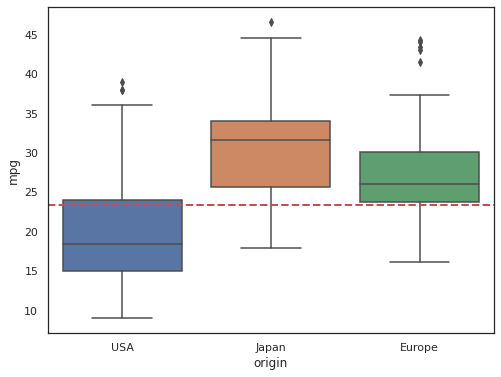

In [141]:
boxplot_feature_wise("origin")

So here we can see that, mpg for Japan and Europe is above average while USA is below averag

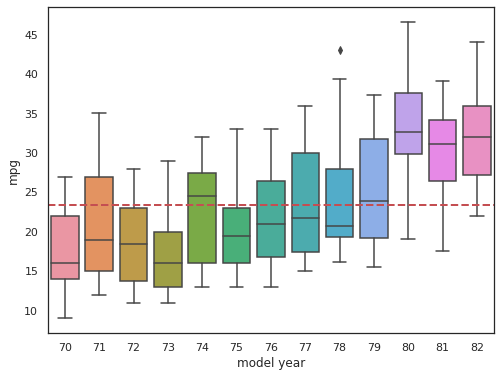

In [142]:
boxplot_feature_wise("model year")

Here, a slight upward trend is obeseved, as model year increases mpg is also increasing

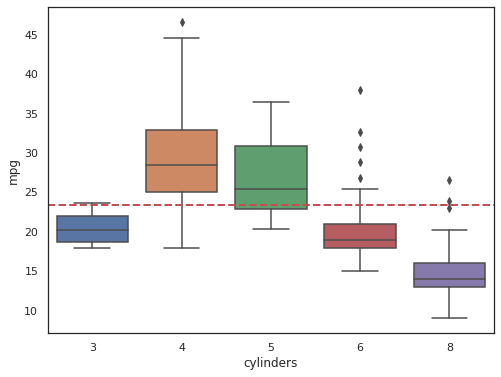

In [143]:
boxplot_feature_wise("cylinders")

Cars with 4 and 5 cylinders, tend to have higher mpg

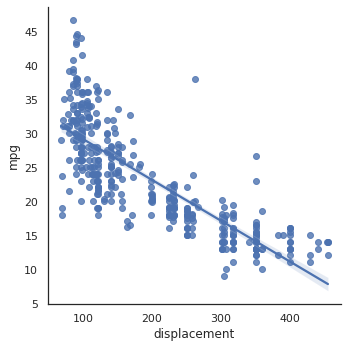

In [144]:
sns.lmplot(x = "displacement", y = "mpg", data = df_no_na)

From above graph it's clear that mpg decreases as displacement is increased.

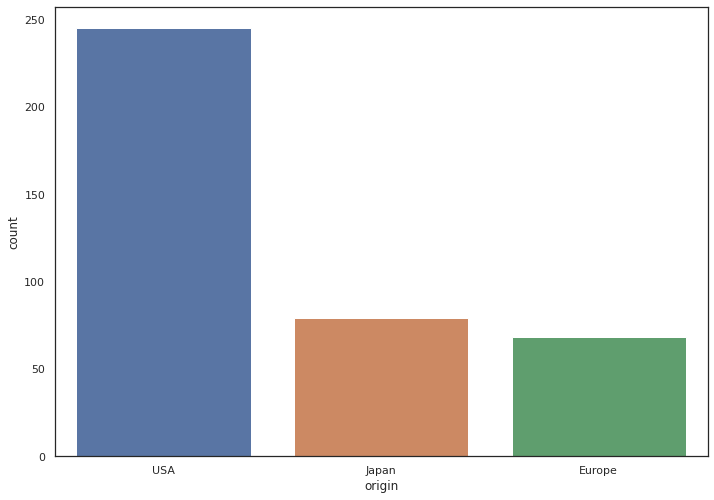

In [145]:
sns.countplot(x = "origin", data = df_viz)

Dataset has most of its sample from USA

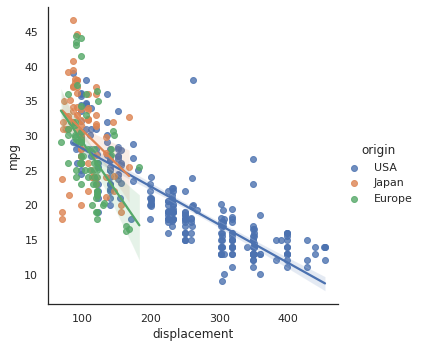

In [146]:
sns.lmplot(x = "displacement", y = "mpg", data = df_viz, hue = "origin")

Displacement values for cars in USA is more compaired to other countries.

In [147]:
df_viz["work_per_hp"] =   df_viz["displacement"] * df_viz["weight"] / df_viz["horsepower"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


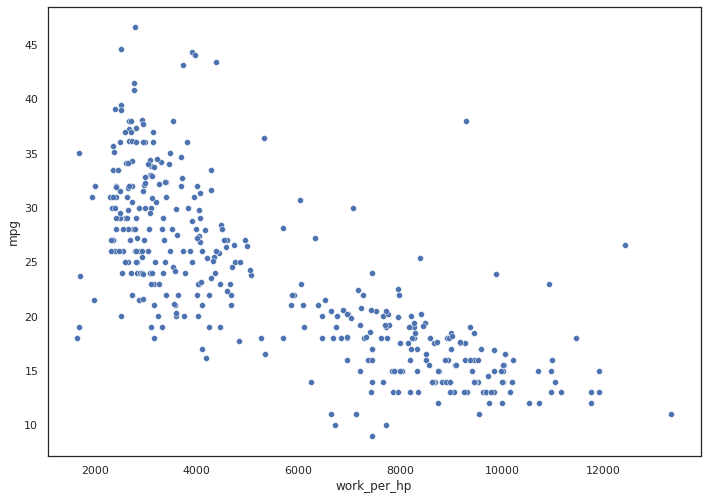

In [148]:
sns.scatterplot(x = "work_per_hp", y = "mpg", data = df_viz)

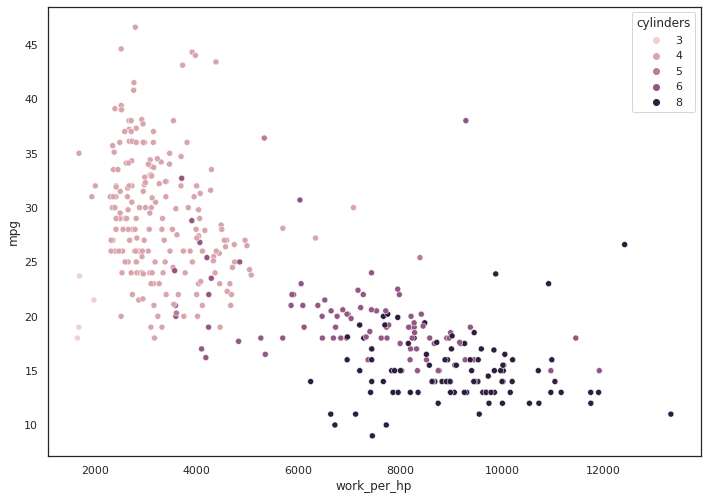

In [149]:
sns.scatterplot(x = "work_per_hp", y = "mpg", data = df_viz, hue = "cylinders")

In [150]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters = 2
)

model.fit(df_viz["work_per_hp"].values.reshape(-1, 1), df_viz["mpg"].values.reshape(-1, 1))

KMeans(n_clusters=2)

In [151]:
df_viz["cluster_id"] = model.predict(df_viz["work_per_hp"].values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


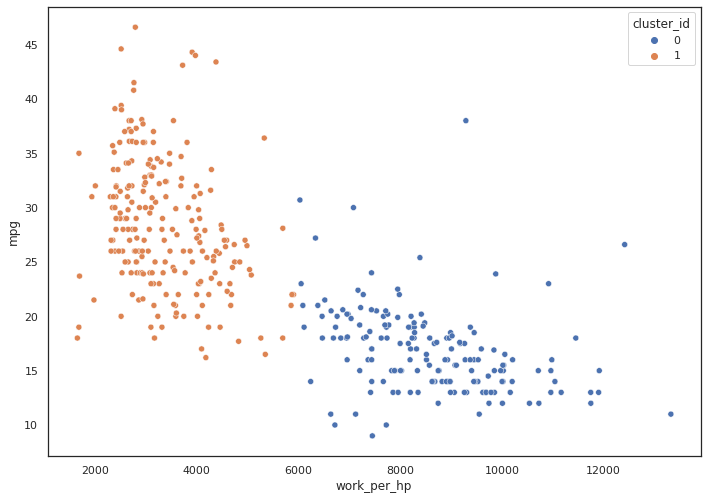

In [152]:
sns.scatterplot(x = "work_per_hp", y = "mpg", data = df_viz, hue = "cluster_id")

In [153]:
df_viz = df_viz.drop("car name", axis = 1)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.concat([
    df_viz.drop("origin", axis = 1),
    pd.get_dummies(df_viz['origin'], prefix = "origin")
], axis = 1)

x = df.drop("mpg", axis = 1)
y = df["mpg"]
ssx = StandardScaler()
ssy = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.2, 
    random_state=42
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = ssx.fit_transform(X_train)
y_train = ssy.fit_transform(y_train.values.reshape(-1, 1))
X_test = ssx.transform(X_test)
y_test = ssy.transform(y_test.values.reshape(-1, 1))

(313, 11) (313,) (79, 11) (79,)


In [155]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [156]:
reg.score(X_test, y_test)

0.8025678200445475

 $R^2$ Score for given model is **0.8025678200445475**

In [157]:
reg.coef_

array([[-0.01820843,  1.05953007, -0.71283156, -0.22338147,  0.03248606,
         0.34286714, -0.67426918,  0.14059605,  0.04857824,  0.0786088 ,
        -0.10247193]])

In [158]:
feat_impt = {x.columns[i] :reg.coef_.ravel()[i] for i in range(len(x.columns))}

In [162]:
feats = []
coefs = []
for k, v in sorted(feat_impt.items(), key = lambda x: abs(x[1]), reverse = True):
    feats.append(k)
    coefs.append(abs(v))

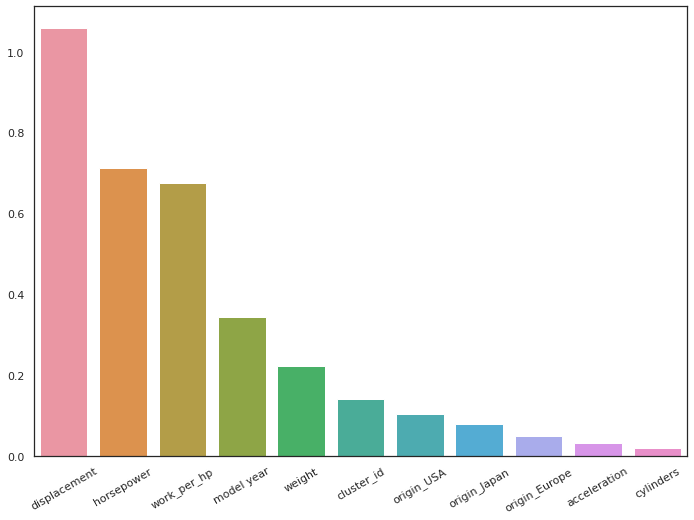

In [164]:
g = sns.barplot(x = feats, y = coefs)
_ = g.set_xticklabels(feats, rotation=30)

In [ ]:
|